Phase 1: Maze Generation & Representation

#Step 1: Represent the Maze

We will use a 2D matrix to represent the maze:

0 represents a path.

1 represents a wall.

S is the start point.

E is the end/goal point.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from collections import deque

# Define the maze as a 2D list
maze = [
    [1, 1, 1, 1, 1, 1, 1, 1, 1],
    [1, 0, 0, 0, 1, 0, 0, 0, 1],
    [1, 0, 1, 0, 1, 0, 1, 0, 1],
    [1, 0, 1, 0, 0, 0, 1, 0, 1],
    [1, 0, 1, 1, 1, 1, 1, 0, 1],
    [1, 0, 0, 0, 0, 0, 0, 0, 1],
    [1, 1, 1, 1, 1, 1, 1, 1, 1]
]

# Define start and end points
start = (1, 1)  # Row 1, Column 1
end = (5, 7)    # Row 5, Column 7


We create a grid-based maze using a 2D list.

start = (1,1) and end = (5,7) are the coordinates for the start and goal positions.

AI Algorithm Implementation (2.5 Hours)

#Step 2: Implement BFS Algorithm
Breadth-First Search (BFS) explores all possible moves level by level.

In [2]:
def bfs(maze, start, end):
    rows, cols = len(maze), len(maze[0])
    queue = deque([(start, [start])])  # Queue stores (current_position, path)
    visited = set()

    while queue:
        (x, y), path = queue.popleft()

        if (x, y) == end:
            return path  # Return path when goal is found

        if (x, y) in visited:
            continue
        visited.add((x, y))

        # Possible movements: Down, Up, Right, Left
        directions = [(1, 0), (-1, 0), (0, 1), (0, -1)]
        for dx, dy in directions:
            nx, ny = x + dx, y + dy
            if 0 <= nx < rows and 0 <= ny < cols and maze[nx][ny] == 0:
                queue.append(((nx, ny), path + [(nx, ny)]))

    return None  # No path found


Uses a queue (FIFO)

Explores neighbors first before going deeper
Tracks visited nodes
Returns shortest path

#Step 3: Implement DFS Algorithm
Depth-First Search (DFS) explores one path deeply before backtracking.

In [3]:
def dfs(maze, start, end):
    rows, cols = len(maze), len(maze[0])
    stack = [(start, [start])]  # Stack stores (current_position, path)
    visited = set()

    while stack:
        (x, y), path = stack.pop()

        if (x, y) == end:
            return path  # Return path when goal is found

        if (x, y) in visited:
            continue
        visited.add((x, y))

        # Possible movements: Down, Up, Right, Left
        directions = [(1, 0), (-1, 0), (0, 1), (0, -1)]
        for dx, dy in directions:
            nx, ny = x + dx, y + dy
            if 0 <= nx < rows and 0 <= ny < cols and maze[nx][ny] == 0:
                stack.append(((nx, ny), path + [(nx, ny)]))

    return None  # No path found


Uses a stack (LIFO)
Explores deeper paths first
May not find the shortest path but finds a solution quickly

#Step 4: Visualizing the Path using Matplotlib
We will visualize the path taken by BFS and DFS using Matplotlib.

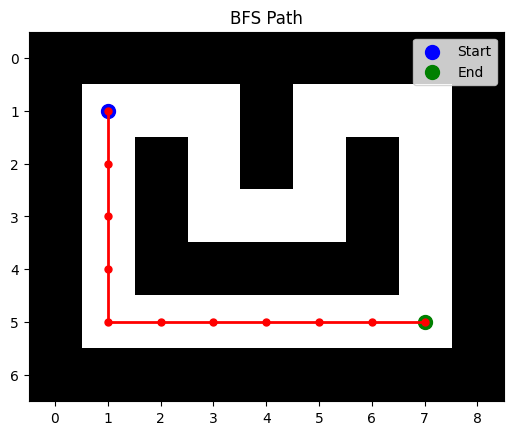

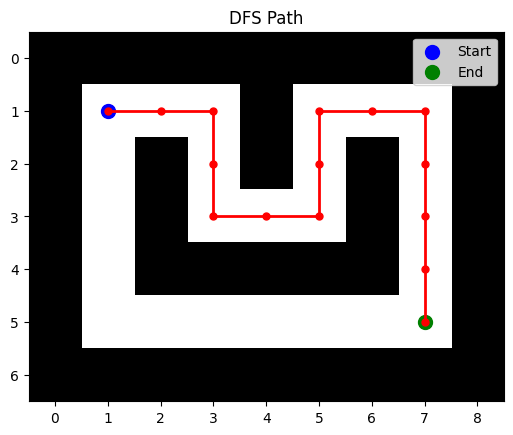

In [4]:
def plot_maze(maze, path, title):
    maze_array = np.array(maze)
    plt.imshow(maze_array, cmap="binary")

    if path:
        path_x, path_y = zip(*path)
        plt.plot(path_y, path_x, marker="o", color="red", markersize=5, linewidth=2)

    plt.scatter(start[1], start[0], color="blue", label="Start", s=100)
    plt.scatter(end[1], end[0], color="green", label="End", s=100)
    plt.title(title)
    plt.legend()
    plt.show()

# Run BFS and DFS
bfs_path = bfs(maze, start, end)
dfs_path = dfs(maze, start, end)

# Plot results
plot_maze(maze, bfs_path, "BFS Path")
plot_maze(maze, dfs_path, "DFS Path")

#Comparing BFS & DFS Performance
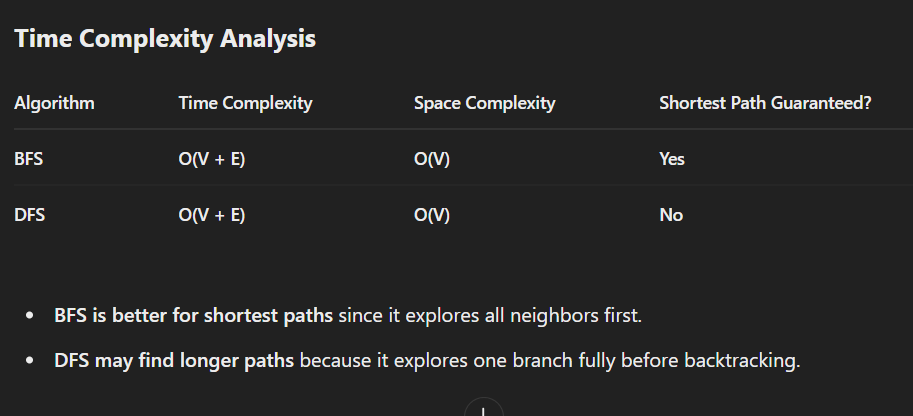

